In [47]:
#imports here
import pandas as pd
import numpy as np
from collections import OrderedDict
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression #(fit_intercept=True, normalize=False, copy_X=True, n_jobs=1)
from sklearn.svm import SVC #(C=1.0, kernel=’rbf’, degree=3, gamma=’auto’, coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape=’ovr’, random_state=None)
from sklearn.metrics import f1_score
from sklearn.neighbors import KNeighborsClassifier #(n_neighbors=5, weights=’uniform’, algorithm=’auto’, leaf_size=30, p=2, metric=’minkowski’, metric_params=None, n_jobs=1, **kwargs)
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

In [2]:
calendar = pd.read_csv("calendar.csv")
listings = pd.read_csv("listings.csv")
reviews = pd.read_csv("reviews.csv")
listings.shape

(3818, 92)

In [3]:
#analyze calendar 
print(calendar.head())
nans = pd.DataFrame(listings.isnull().mean(), columns = ["mean_nan"])
nans = nans[nans["mean_nan"]>0.0]
nans = nans.sort_values("mean_nan", ascending = False)
nans

   listing_id      date available    price
0      241032  04-01-16         t  $85.00 
1      241032  05-01-16         t  $85.00 
2      241032  06-01-16         f      NaN
3      241032  07-01-16         f      NaN
4      241032  08-01-16         f      NaN


,mean_nan
license,1.000000
square_feet,0.974594
monthly_price,0.602672
security_deposit,0.511262
weekly_price,0.473808
notes,0.420639
neighborhood_overview,0.270299
cleaning_fee,0.269775
transit,0.244631
host_about,0.224987


In [4]:
#analyze listings
(listings.head())
print(listings.shape)
listings["host_name"][listings.host_neighbourhood == listings.neighbourhood].shape

(3818, 92)


(3075,)

In [5]:
#listing analysis continues
print(listings.isnull().mean())
print(listings.shape)
print(listings.columns)

id                                  0.000000
listing_url                         0.000000
scrape_id                           0.000000
last_scraped                        0.000000
name                                0.000000
summary                             0.046359
space                               0.149031
description                         0.000000
experiences_offered                 0.000000
neighborhood_overview               0.270299
notes                               0.420639
transit                             0.244631
thumbnail_url                       0.083814
medium_url                          0.083814
picture_url                         0.000000
xl_picture_url                      0.083814
host_id                             0.000000
host_url                            0.000000
host_name                           0.000524
host_since                          0.000524
host_location                       0.002095
host_about                          0.224987
host_respo

In [6]:
#listings[["neighbourhood"]].fillna(value="", axis=1)
groups = (listings.groupby("neighbourhood", axis = 0))
hoods = {}
#hoods = []
for name,group in groups:
    #hood["name"] = name
    #hood["listings"] = group.shape[0]
    hoods.update({name:int(group.shape[0])})
    print (name)
    print (group.shape[0])

Alki
23
Arbor Heights
3
Atlantic
50
Ballard
213
Belltown
204
Bitter Lake
13
Brighton
5
Broadview
16
Broadway
5
Bryant
32
Capitol Hill
351
Cedar Park
8
Central Business District
81
Columbia City
61
Crown Hill
21
Dunlap
13
Eastlake
41
Fairmount Park
1
Fauntleroy
10
First Hill
105
Fremont
148
Gatewood
18
Genesee
29
Georgetown
7
Green Lake
52
Greenwood
79
Haller Lake
14
Harrison/Denny-Blaine
13
High Point
11
Highland Park
12
Holly Park
6
Industrial District
3
Interbay
7
International District
17
Laurelhurst
9
Leschi
44
Licton Springs
12
Lower Queen Anne
83
Madison Park
16
Madrona
40
Magnolia
55
Maple Leaf
41
Mathews Beach
17
Meadowbrook
9
Minor
192
Montlake
19
Mount Baker
46
North Admiral
48
North Beach/Blue Ridge
11
North Beacon Hill
95
North College Park
1
North Delridge
27
Olympic Hills
12
Phinney Ridge
56
Pike Market
2
Pike Place Market
39
Pinehurst
3
Pioneer Square
14
Portage Bay
14
Queen Anne
187
Rainier Beach
18
Ravenna
59
Riverview
8
Roosevelt
27
Roxhill
1
Seaview
9
Seward Park
32


{'Alki': 23, 'Arbor Heights': 3, 'Atlantic': 50, 'Ballard': 213, 'Belltown': 204, 'Bitter Lake': 13, 'Brighton': 5, 'Broadview': 16, 'Broadway': 5, 'Bryant': 32, 'Capitol Hill': 351, 'Cedar Park': 8, 'Central Business District': 81, 'Columbia City': 61, 'Crown Hill': 21, 'Dunlap': 13, 'Eastlake': 41, 'Fairmount Park': 1, 'Fauntleroy': 10, 'First Hill': 105, 'Fremont': 148, 'Gatewood': 18, 'Genesee': 29, 'Georgetown': 7, 'Green Lake': 52, 'Greenwood': 79, 'Haller Lake': 14, 'Harrison/Denny-Blaine': 13, 'High Point': 11, 'Highland Park': 12, 'Holly Park': 6, 'Industrial District': 3, 'Interbay': 7, 'International District': 17, 'Laurelhurst': 9, 'Leschi': 44, 'Licton Springs': 12, 'Lower Queen Anne': 83, 'Madison Park': 16, 'Madrona': 40, 'Magnolia': 55, 'Maple Leaf': 41, 'Mathews Beach': 17, 'Meadowbrook': 9, 'Minor': 192, 'Montlake': 19, 'Mount Baker': 46, 'North Admiral': 48, 'North Beach/Blue Ridge': 11, 'North Beacon Hill': 95, 'North College Park': 1, 'North Delridge': 27, 'Olympic

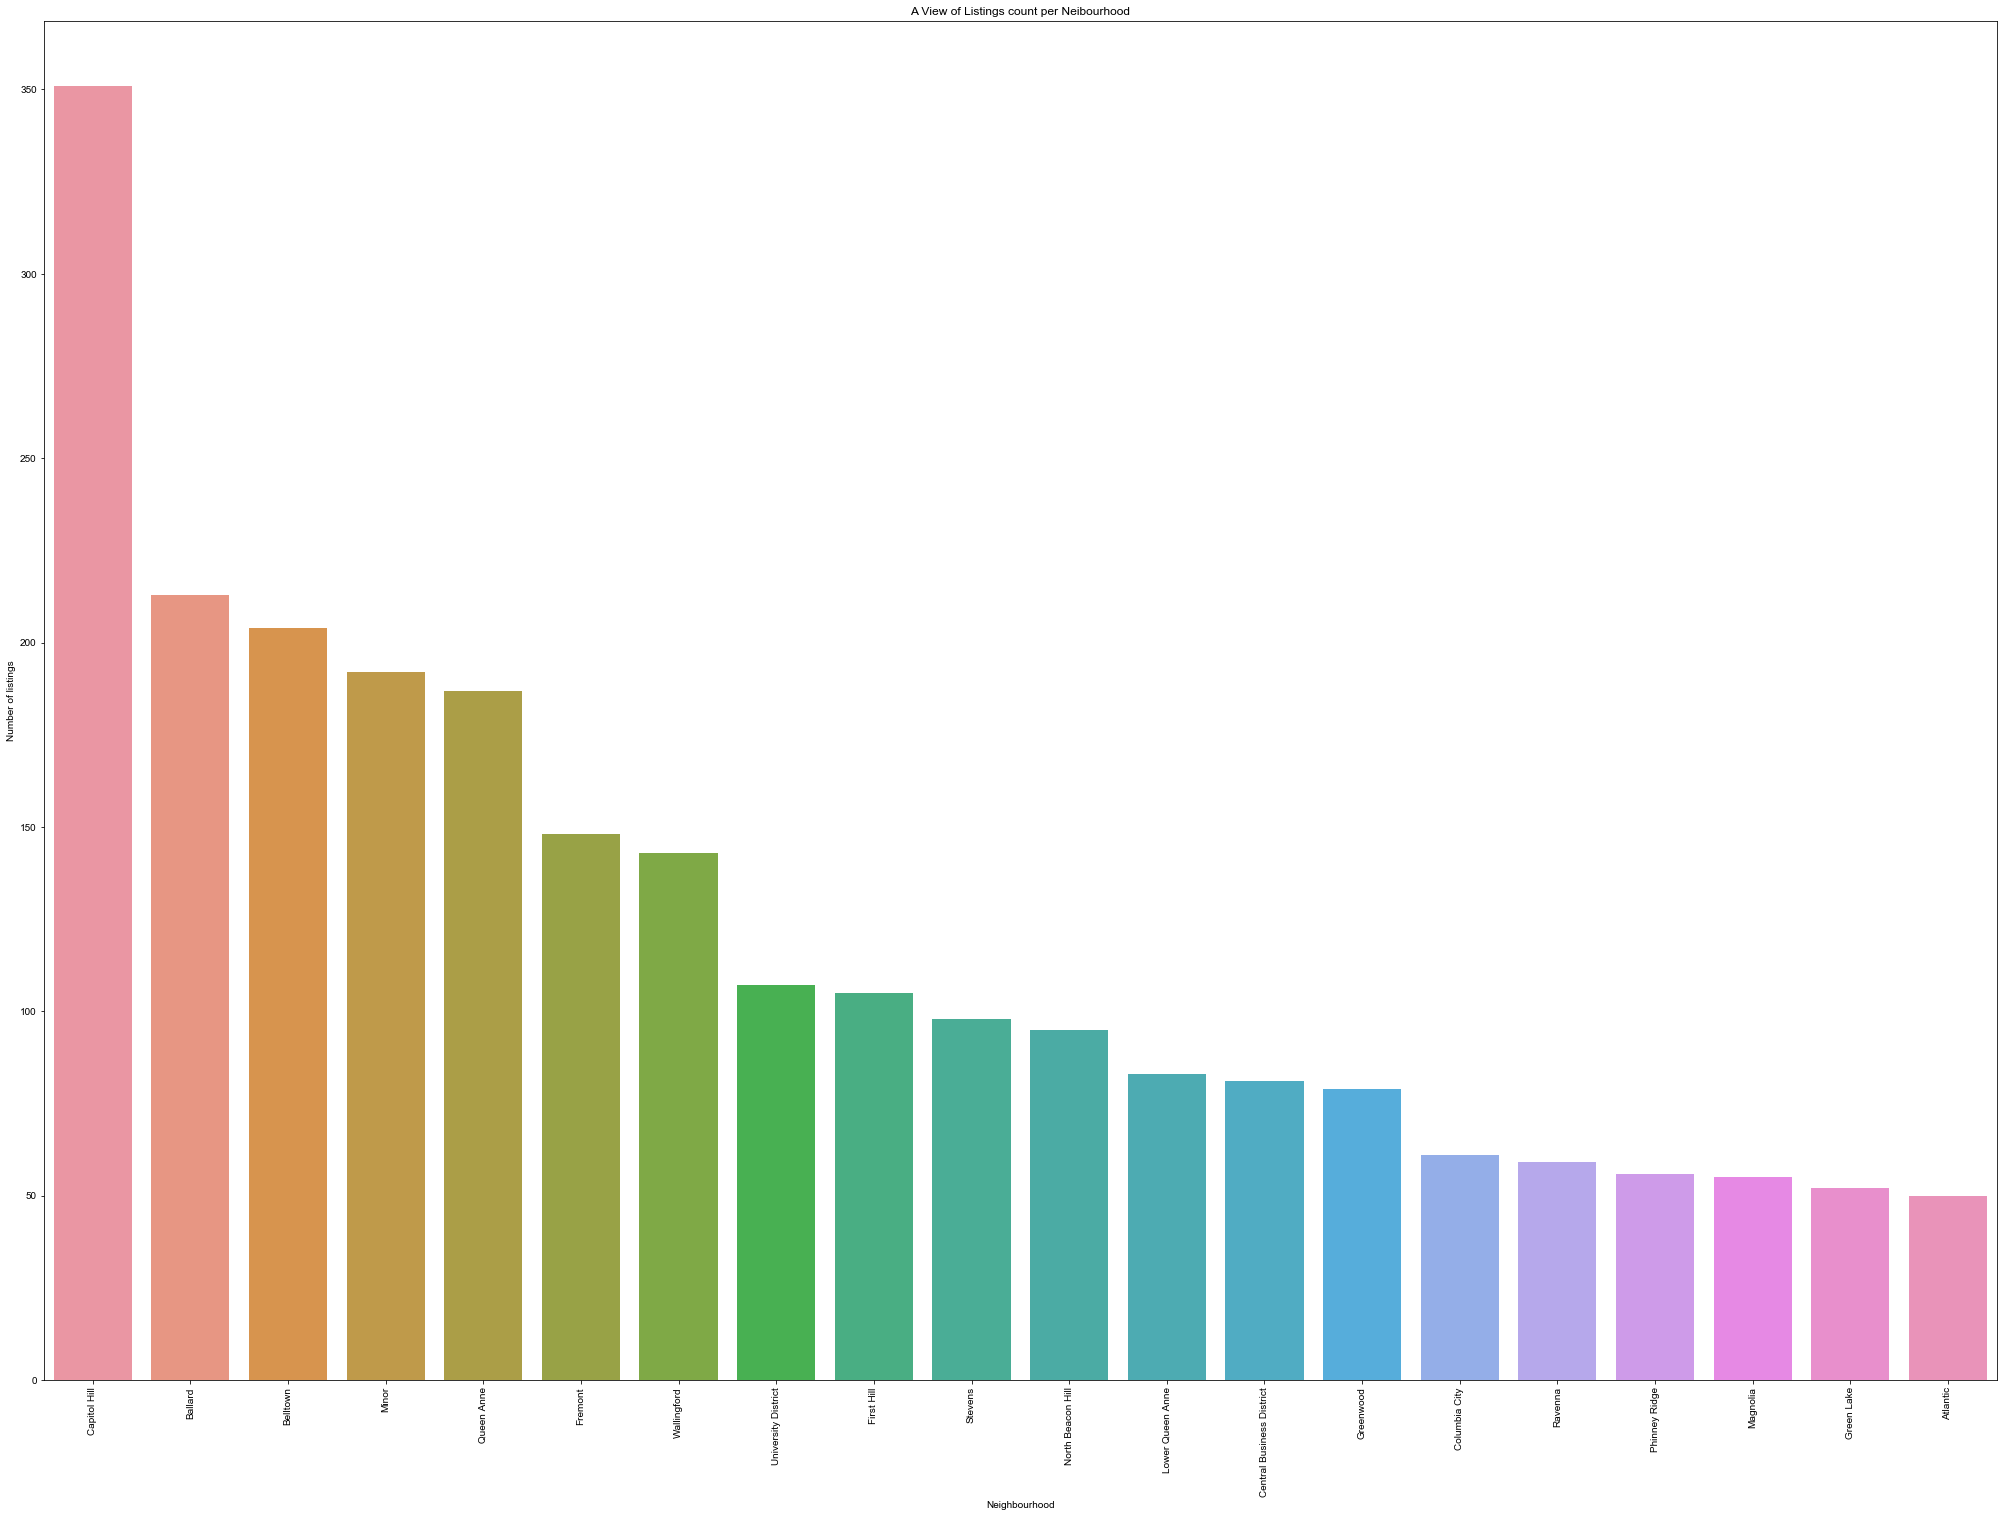

In [7]:
print(hoods)
#hoods = (hoods.items())
sorted_hoods_with_listings = sorted(hoods.items(), key=lambda x: x[1], reverse=True )
sorted_hoods_with_listings = dict(sorted_hoods_with_listings)
#print(type(list(sorted_hoods_with_listings.keys())))
plt.subplots(figsize=(35,25))
g = sns.barplot(x = list(sorted_hoods_with_listings.keys())[0:20], y = list(sorted_hoods_with_listings.values())[0:20], errcolor ="b")
g.set_xticklabels(labels =list(sorted_hoods_with_listings.keys())[0:20] , rotation=90)
g.set(xlabel='Neighbourhood', ylabel='Number of listings')
g.set_title("A View of Listings count per Neibourhood")
sns.set(font_scale = 3)
plt.show()

In [8]:
from collections import Counter
print(Counter(listings.isnull().mean()))

Counter({0.0: 47, 0.0005238344683080147: 9, 0.08381351492928235: 3, 0.1642221058145626: 3, 0.13698271346254584: 2, 0.00026191723415400735: 2, 0.17234154007333682: 2, 0.046359350445259295: 1, 0.14903090623363016: 1, 0.27029858564693554: 1, 0.42063907805133577: 1, 0.24463069669984286: 1, 0.0020953378732320588: 1, 0.2249869041382923: 1, 0.20246202200104768: 1, 0.0785751702462022: 1, 0.10895756940806706: 1, 0.0018334206390780514: 1, 0.0041906757464641176: 1, 0.001571503404924044: 1, 0.9745940282870613: 1, 0.4738082765845993: 1, 0.6026715557883708: 1, 0.5112624410686223: 1, 0.26977475117862754: 1, 0.16946045049764275: 1, 0.17103195390256679: 1, 0.17050811943425878: 1, 0.1715557883708748: 1, 0.17181770560502882: 1, 1.0: 1})


In [9]:
#clean price data by removing the dollar sign and converting to float
#Columns with prices are [price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people]

func1 = lambda a: a.replace('$','')
func2 = lambda a: a.replace(',','')

price_cols = ["price","weekly_price","monthly_price","security_deposit","cleaning_fee","guests_included","extra_people"]
for temp in price_cols:
    listings[temp] = listings[temp].astype("str")
    listings[temp] = listings[temp].apply(func1)
    listings[temp] = listings[temp].apply(func2)
    listings[temp] = listings[temp].astype("float")
    

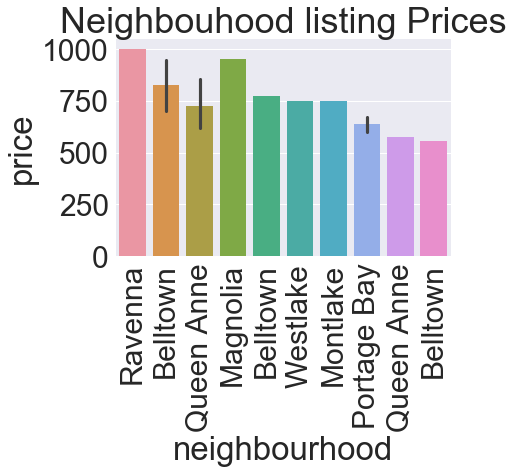

In [10]:
#neighbourhood with most expensive listing
#print(listings["weekly_price"].isnull().mean())
hood_price = listings[["price", "neighbourhood"]][listings["price"] > listings["price"].mean()]
hood_price = hood_price.sort_values("price", ascending = False)
hood_price = hood_price.iloc[0:20,:]
g = sns.barplot(data = hood_price, x = "neighbourhood", y = "price")
g.set_xticklabels(labels =hood_price["neighbourhood"] , rotation=90)
g.set_title("Neighbouhood listing Prices")
sns.set(font_scale = 2)

plt.show()

In [11]:
hood_price


,price,neighbourhood
3122,1000.0,Ravenna
1208,999.0,Belltown
2,975.0,Queen Anne
3443,950.0,Magnolia
1279,899.0,Belltown
565,775.0,Westlake
2566,750.0,Montlake
2518,750.0,Portage Bay
239,749.0,Queen Anne
1312,700.0,Belltown


In [12]:
#What are the currently available listings with entire home apartments, which got a review in the last 6 months?
calendar["date"] = pd.to_datetime(calendar["date"]).dt.date

In [13]:
import datetime
t = datetime.datetime.strptime('25122016', "%d%m%Y").date()
print(t.day)
type(calendar["date"][0])
new_year_listings = calendar[["listing_id","date"]][calendar["date"] == t]
final = pd.merge(listings[["id","name","price","neighbourhood"]], new_year_listings, left_on = 'id', right_on = 'listing_id')
final

25


,id,name,price,neighbourhood,listing_id,date
0,241032,Stylish Queen Anne Apartment,85.0,Queen Anne,241032,2016-12-25
1,953595,Bright & Airy Queen Anne Apartment,150.0,Queen Anne,953595,2016-12-25
2,3308979,New Modern House-Amazing water view,975.0,Queen Anne,3308979,2016-12-25
3,7421966,Queen Anne Chateau,100.0,Queen Anne,7421966,2016-12-25
4,278830,Charming craftsman 3 bdm house,450.0,Queen Anne,278830,2016-12-25
5,5956968,Private unit in a 1920s mansion,120.0,Queen Anne,5956968,2016-12-25
6,1909058,Queen Anne Private Bed and Bath,80.0,Queen Anne,1909058,2016-12-25
7,856550,Tiny Garden cabin on Queen Anne,60.0,Queen Anne,856550,2016-12-25
8,4948745,Urban Charm || Downtown || Views,90.0,Queen Anne,4948745,2016-12-25
9,2493658,Airy + Bright Queen Anne Apartment,150.0,Queen Anne,2493658,2016-12-25


In [14]:
final.drop_duplicates(["neighbourhood"])
groups = final.groupby(["neighbourhood","price"], axis = 0, sort = True)
sorted_df = final.sort_values(by=['price'], ascending = False)
#sorted_df
hoods_count = Counter(final["neighbourhood"])
hoods_count = hoods_count.most_common()
hoods_count = hoods_count[1:]
hoods = []
count = []
for i in (hoods_count[:10]):
    hoods.append(i[0])
    count.append(i[1])
print(hoods)
print(count)


['Capitol Hill', 'Belltown', 'Minor', 'Queen Anne', 'Wallingford', 'Ballard', 'University District', 'First Hill', 'North Beacon Hill', 'Central Business District']
[263, 203, 187, 180, 139, 123, 106, 100, 95, 81]


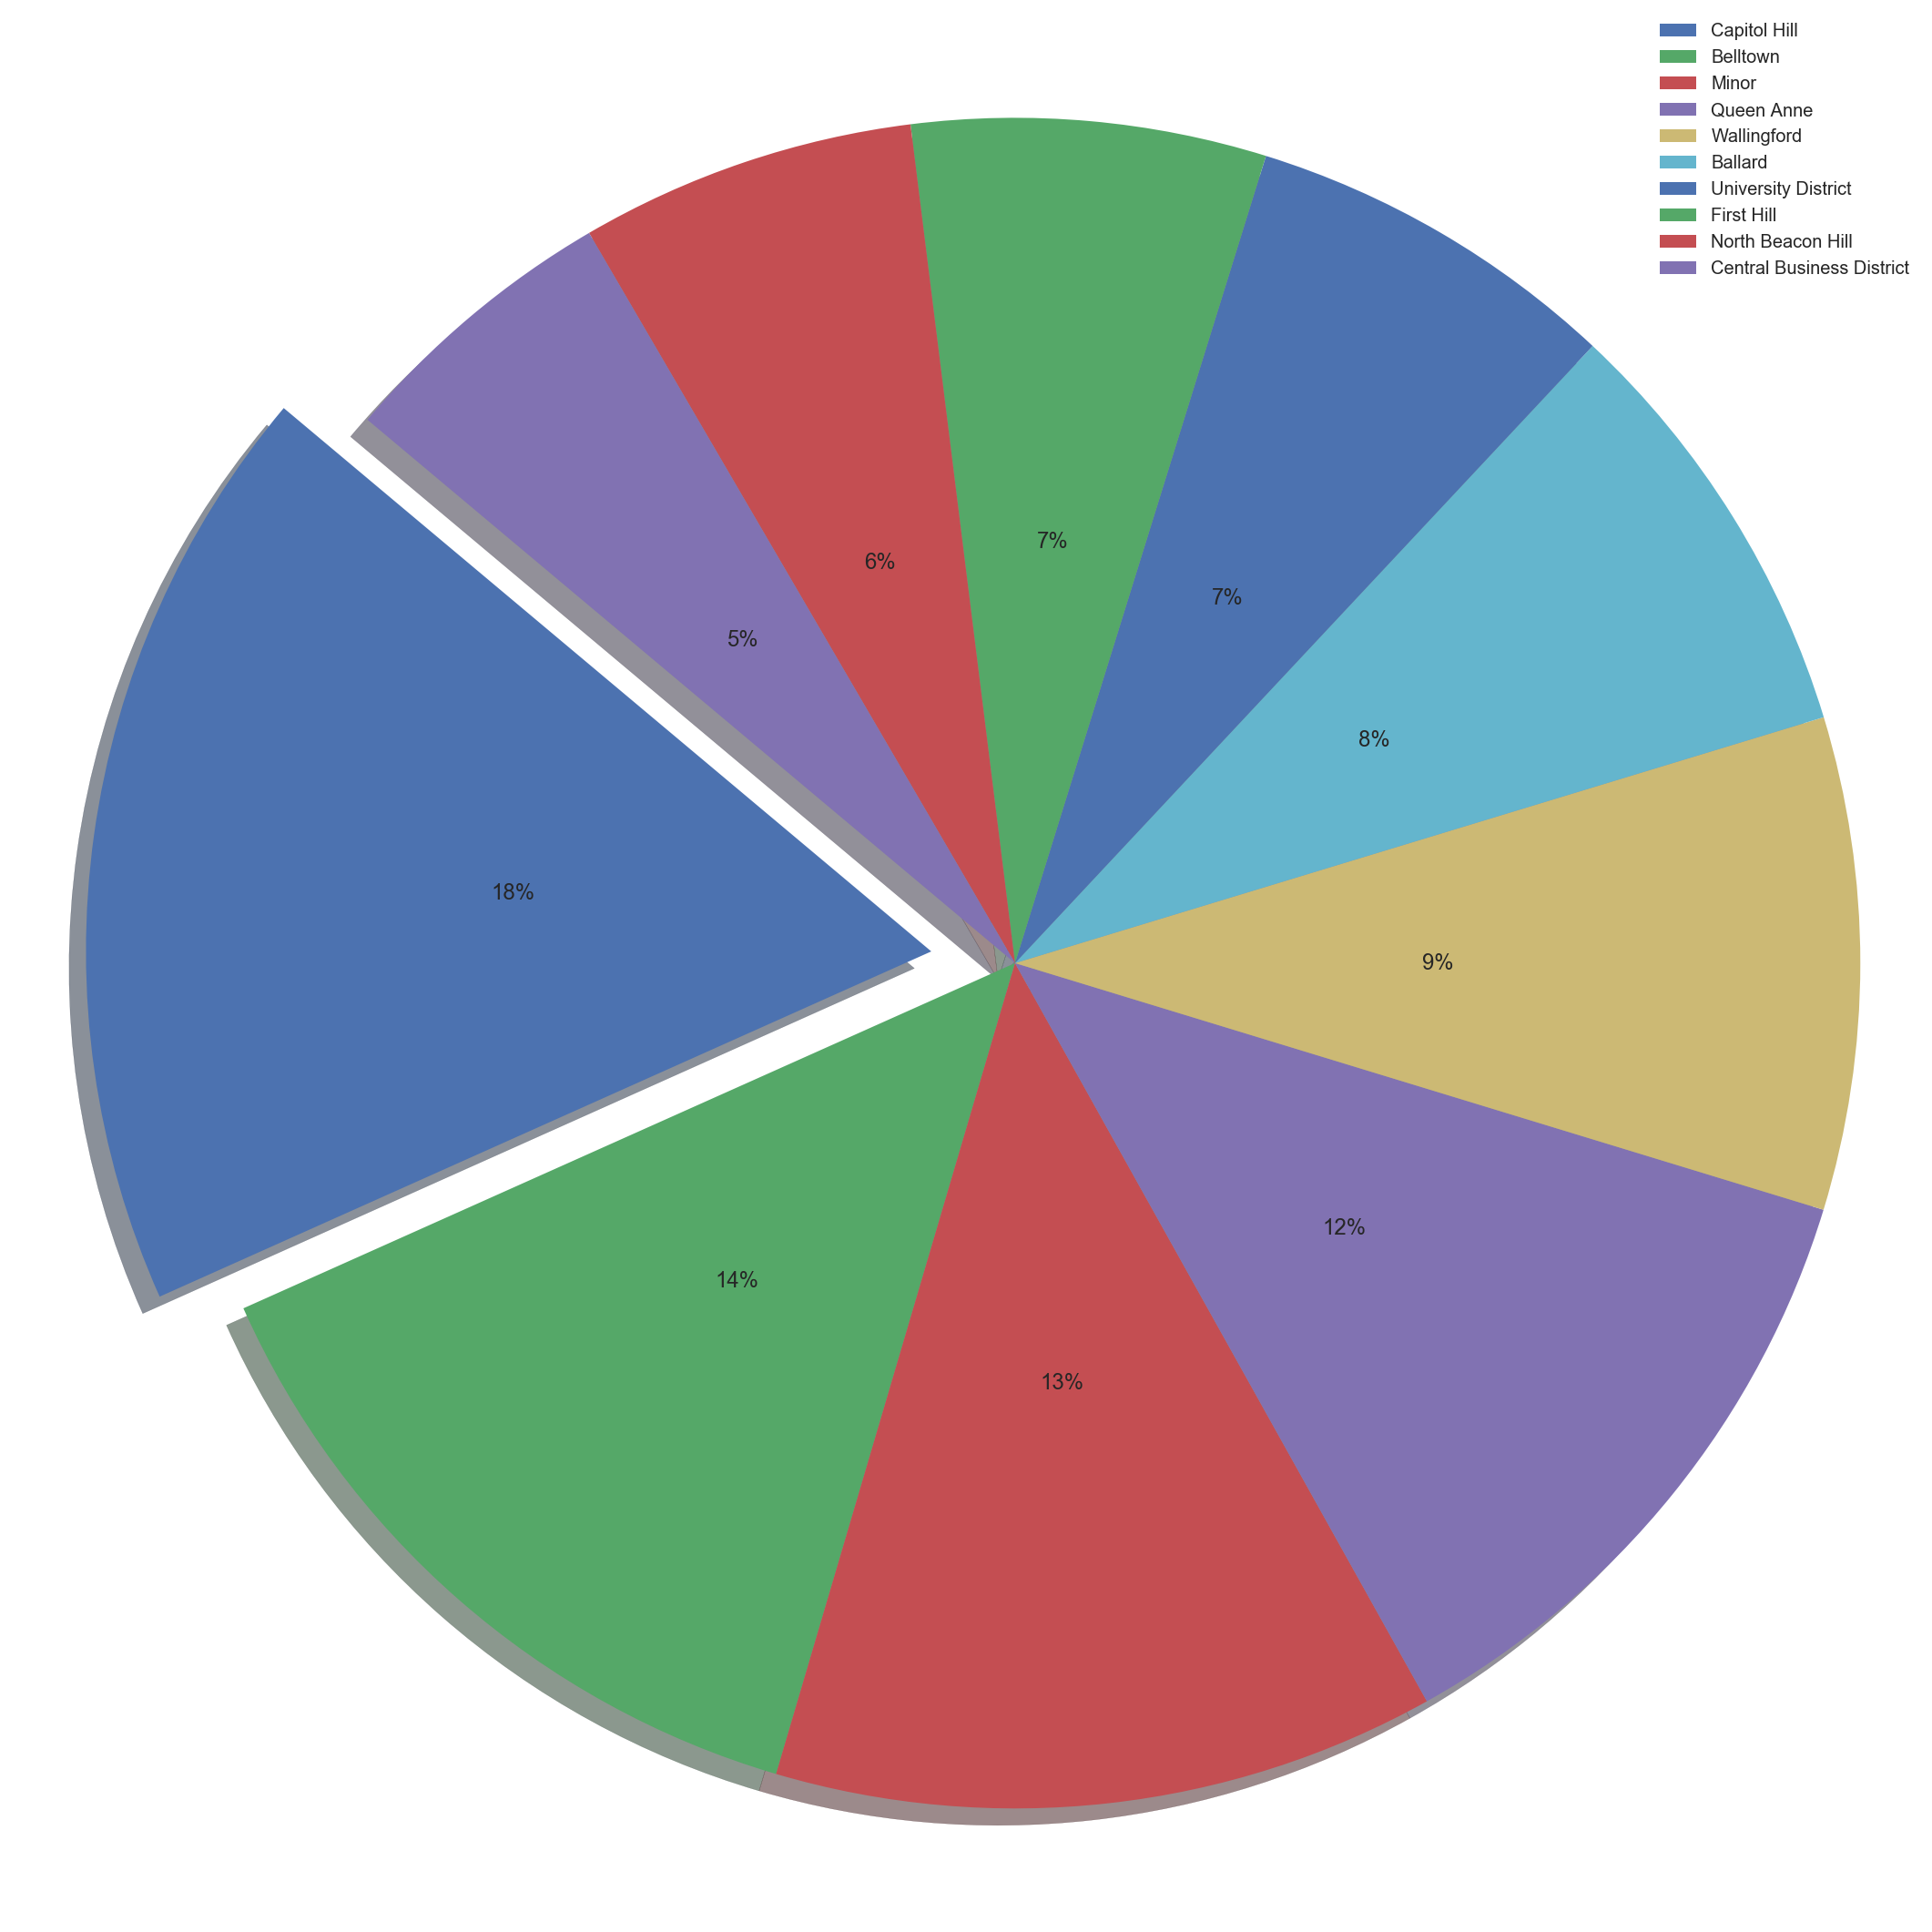

In [15]:
#Draw seaborn pie chart
explode = (0.1, 0, 0, 0,0,0,0,0,0,0)
plt.subplots(figsize=(30,30))
patches, texts,_ = plt.pie(count,autopct='%1.0f%%',pctdistance=0.5, explode=explode, shadow=True, startangle=140)
plt.legend(patches, hoods, loc="best")
plt.axis('equal')
plt.tight_layout()
sns.set(font_scale = 6)
plt.show()


In [16]:
#predict the price of the net rbnb
Xy = listings[["id", "description", "reviews_per_month", "square_feet", "amenities", "bed_type","beds", "bedrooms", "bathrooms","accommodates", "room_type", "property_type","price"]]
#y = listings["price"]

temp = listings[["id", "description", "reviews_per_month", "square_feet", "amenities", "bed_type","beds", "bedrooms", "bathrooms","accommodates", "room_type", "property_type","price"]]


In [17]:
Xy.head()


,id,description,reviews_per_month,square_feet,amenities,bed_type,beds,bedrooms,bathrooms,accommodates,room_type,property_type,price
0,241032,Make your self at home in this charming one-be...,4.07,NaN,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",Real Bed,1.0,1.0,1.0,4,Entire home/apt,Apartment,85.0
1,953595,Chemically sensitive? We've removed the irrita...,1.48,NaN,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",Real Bed,1.0,1.0,1.0,4,Entire home/apt,Apartment,150.0
2,3308979,New modern house built in 2013. Spectacular s...,1.15,NaN,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",Real Bed,7.0,5.0,4.5,11,Entire home/apt,House,975.0
3,7421966,A charming apartment that sits atop Queen Anne...,NaN,NaN,"{Internet,""Wireless Internet"",Kitchen,""Indoor ...",Real Bed,2.0,0.0,1.0,3,Entire home/apt,Apartment,100.0
4,278830,Cozy family craftman house in beautiful neighb...,0.89,NaN,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",Real Bed,3.0,3.0,2.0,6,Entire home/apt,House,450.0


In [18]:
Xy["square_feet"].isnull().mean()

0.9745940282870613

The square feet information is practically absent, with more that 97% of values being null. This column doesn't provide much information, and should be droped.

In [19]:
Xy = Xy.drop("square_feet", axis=1)
Xy.shape

(3818, 12)

The Amenities column consist of a set of house equipments, each embeded as string, and needs to be extracted as a list.
This set is very important as they directly correlated with the pricing of a listing

In [20]:
Xy.amenities = Xy.amenities.apply(lambda x: x.replace("\"",""))
Xy.amenities = Xy.amenities.apply(lambda x: x.replace("{",""))
Xy.amenities = Xy.amenities.apply(lambda x: x.replace("}",""))
Xy.amenities = Xy.amenities.apply(lambda x: x.split(","))


In [21]:
#X.amenities[0:10]
#for temp in X.amenities:
print(Xy.amenities[len(Xy.amenities)-1])
print(Xy.amenities[0])
print(Xy.amenities[10])
print(Xy.amenities[9])
print(Xy.amenities[11])
print(Xy.amenities[30])





['TV', 'Cable TV', 'Internet', 'Wireless Internet', 'Kitchen', 'Free Parking on Premises', 'Pets live on this property', 'Dog(s)', 'Elevator in Building', 'Hot Tub', 'Indoor Fireplace', 'Buzzer/Wireless Intercom', 'Heating', 'Family/Kid Friendly', 'Washer', 'Dryer', 'Smoke Detector', 'Essentials', 'Shampoo', 'Hangers', 'Iron', 'Laptop Friendly Workspace']
['TV', 'Cable TV', 'Internet', 'Wireless Internet', 'Air Conditioning', 'Kitchen', 'Heating', 'Family/Kid Friendly', 'Washer', 'Dryer']
['TV', 'Cable TV', 'Internet', 'Wireless Internet', 'Kitchen', 'Free Parking on Premises', 'Heating', 'Washer', 'Dryer', 'Smoke Detector', 'Carbon Monoxide Detector', 'First Aid Kit', 'Safety Card', 'Fire Extinguisher', 'Essentials', 'Shampoo', '24-Hour Check-in', 'Hangers', 'Hair Dryer', 'Iron', 'Laptop Friendly Workspace']
['TV', 'Internet', 'Wireless Internet', 'Kitchen', 'Free Parking on Premises', 'Buzzer/Wireless Intercom', 'Heating', 'Family/Kid Friendly', 'Washer', 'Dryer', 'Smoke Detector', '

Being one of the most important factors contributing to the price of an RBNB, the following columns from the amenities preprocessed lists where added to the set of predicve attribute for the price:

['TV', 'Cable TV', 'Wireless Internet', 'Kitchen', 'Free Parking on Premises', 'Indoor Fireplace', 'Heating', 'Smoke Detector', 'Carbon Monoxide Detector', 'Fire Extinguisher', 'Essentials', 'Shampoo','Elevator in Building','Washer','Dryer','Hangers','Iron','Laptop Friendly Workplace','First Aid Kit','Air Conditioning','Family/Kid Friendly','Carbon Monoxide Detector']


In [22]:
amenities = pd.DataFrame(columns = ['TV', 'Cable TV', 'Wireless Internet', 'Kitchen', 'Free Parking on Premises', 'Indoor Fireplace', 'Heating', 'Smoke Detector', 'Carbon Monoxide Detector', 'Fire Extinguisher', 'Essentials', 'Shampoo','Elevator in Building','Washer','Dryer','Hangers','Iron','Laptop Friendly Workplace','First Aid Kit','Air Conditioning','Family/Kid Friendly','Carbon Monoxide Detector'])

In [23]:
for i in range(0,len(Xy.amenities)):
    is_available_list = []
    for col in amenities.columns:
        #print(type(col))
        #print(X.amenities[0])
        if col in Xy.amenities[i]:
            is_available_list.append(int(1))
        else:
            is_available_list.append(int(0))
    
    amenities.loc[i] = is_available_list
            
        

The description attribute was counted as a main price determinant as well, given that it correlates with pricing as well. Nonetheless, descriptions here are in string format of very long text which would correspond to a large number of additional columns if one-hot encoded via Natural Language Processing for instance. Adding such a large number of attributes would adversely hinder the predicitve performance, given that there are only 3,818 samples.   

In [24]:
#append amenities to the original X dataframe
Xy = pd.concat([Xy,amenities], axis =1)
#remove the amenities column
Xy = Xy.drop("amenities", axis=1)
Xy = Xy.drop("description", axis=1)
Xy_final = Xy.copy()


In [25]:
print(Xy_final.shape)
print (amenities.shape)
Xy_final.columns

(3818, 32)
(3818, 22)


Index(['id', 'reviews_per_month', 'bed_type', 'beds', 'bedrooms', 'bathrooms',
       'accommodates', 'room_type', 'property_type', 'price', 'TV', 'Cable TV',
       'Wireless Internet', 'Kitchen', 'Free Parking on Premises',
       'Indoor Fireplace', 'Heating', 'Smoke Detector',
       'Carbon Monoxide Detector', 'Fire Extinguisher', 'Essentials',
       'Shampoo', 'Elevator in Building', 'Washer', 'Dryer', 'Hangers', 'Iron',
       'Laptop Friendly Workplace', 'First Aid Kit', 'Air Conditioning',
       'Family/Kid Friendly', 'Carbon Monoxide Detector'],
      dtype='object')

In [26]:
Xy_final = Xy_final.drop("id", axis=1)
Xy_final.shape

(3818, 31)

In [27]:
Xy_final.head()

,reviews_per_month,bed_type,beds,bedrooms,bathrooms,accommodates,room_type,property_type,price,TV,...,Elevator in Building,Washer,Dryer,Hangers,Iron,Laptop Friendly Workplace,First Aid Kit,Air Conditioning,Family/Kid Friendly,Carbon Monoxide Detector
0,4.07,Real Bed,1.0,1.0,1.0,4,Entire home/apt,Apartment,85.0,1,...,0,1,1,0,0,0,0,1,1,0
1,1.48,Real Bed,1.0,1.0,1.0,4,Entire home/apt,Apartment,150.0,1,...,0,1,1,0,0,0,1,0,1,1
2,1.15,Real Bed,7.0,5.0,4.5,11,Entire home/apt,House,975.0,1,...,0,1,1,0,0,0,0,1,1,1
3,NaN,Real Bed,2.0,0.0,1.0,3,Entire home/apt,Apartment,100.0,0,...,0,1,1,0,0,0,0,0,1,1
4,0.89,Real Bed,3.0,3.0,2.0,6,Entire home/apt,House,450.0,1,...,0,0,0,0,0,0,1,0,1,1


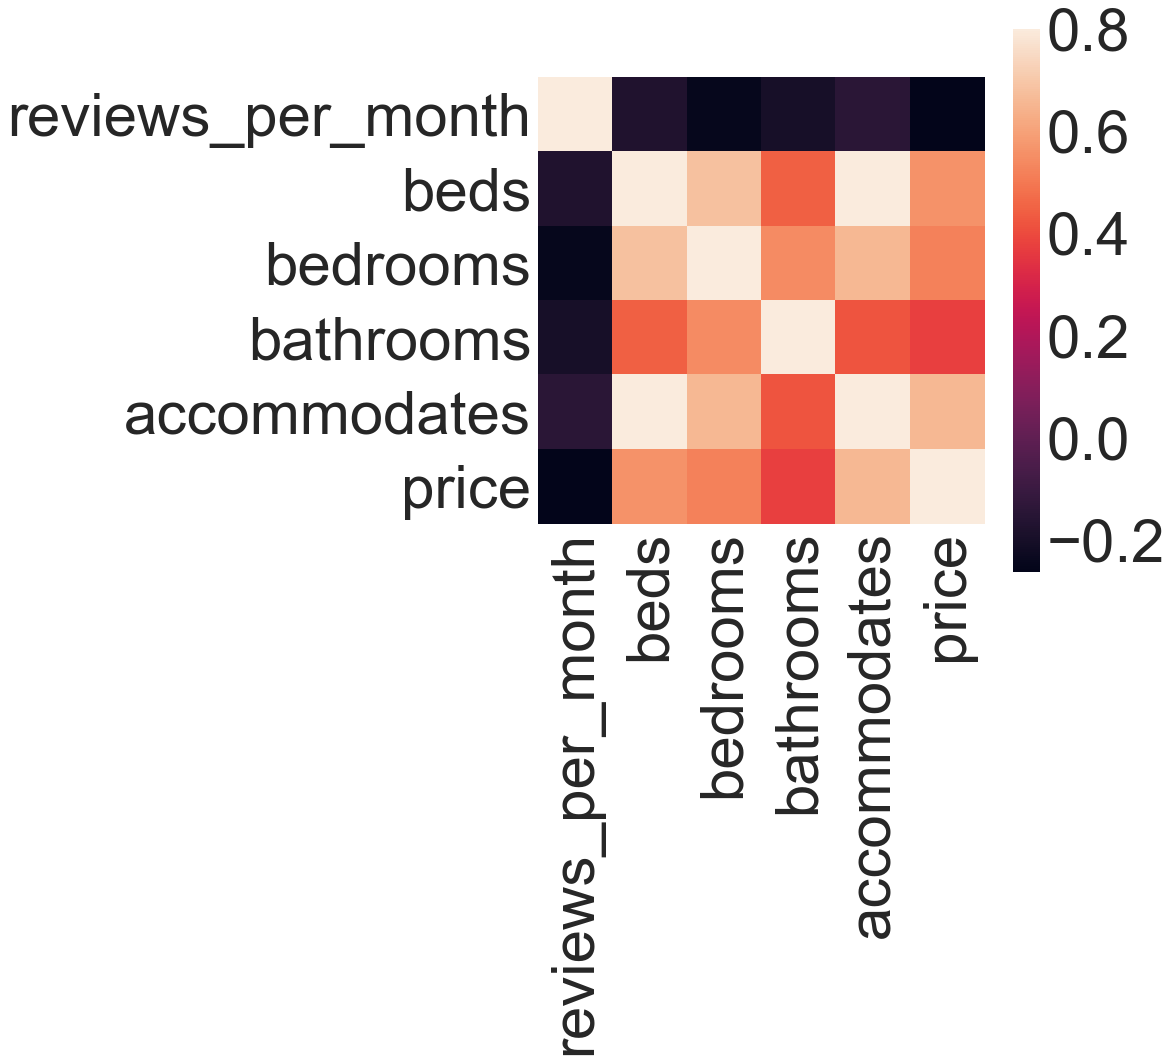

In [28]:
#Generate correlation matrix
cor_data= Xy_final.copy()
#cor_data = cor_data.join(y)
corrmat = cor_data.corr(method = 'spearman')
f, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corrmat, vmax=.8, square=True)
sns.set(font_scale = 2)
plt.show()

In [29]:
#get dummies (encode categoricals)
Xy_final = pd.get_dummies(Xy_final, dummy_na=True, columns=["bed_type","room_type","property_type"])

In [30]:
print (Xy_final.shape)
Xy_final.isnull().mean()

(3818, 55)


reviews_per_month                0.164222
beds                             0.000262
bedrooms                         0.001572
bathrooms                        0.004191
accommodates                     0.000000
price                            0.000000
TV                               0.000000
Cable TV                         0.000000
Wireless Internet                0.000000
Kitchen                          0.000000
Free Parking on Premises         0.000000
Indoor Fireplace                 0.000000
Heating                          0.000000
Smoke Detector                   0.000000
Carbon Monoxide Detector         0.000000
Fire Extinguisher                0.000000
Essentials                       0.000000
Shampoo                          0.000000
Elevator in Building             0.000000
Washer                           0.000000
Dryer                            0.000000
Hangers                          0.000000
Iron                             0.000000
Laptop Friendly Workplace        0

Juste four columns (reviews_per_month, beds, bedrooms, bathrooms) contains null values, and a minimal percentage of each were null thus, they were replaced by the mean of those columns.  

In [31]:
func = lambda a:a.fillna(a.mean())

Xy_final = Xy_final.apply(func)

Now we split the dataset into training and testing, the predict prices, using the folowing ML models:
Linear Regresion
SVM
KNN

In [36]:
y_final = Xy_final["price"]
X_final = Xy_final.drop("price", axis = 1)
print(y_final.shape)
print(X_final.shape)

X_train, X_test, y_train, y_test =  train_test_split(X_final, y_final, test_size= 0.25, random_state = 40)

(3818,)
(3818, 54)


Lets Scale or data with mean 0 and standard deviation of 1. This avoids negative effects from outliers  

In [39]:

scaler = StandardScaler(copy=True, with_mean=True, with_std=True)
scale = scaler.fit(X_train,y_train)
X_train_scaled = scaler.transform(X_train,y_train)

#print(type(Xy_final_scaled))
X_train_scaled.shape

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:675: DeprecationWarning: The parameter y on transform() is deprecated since 0.19 and will be removed in 0.21
  DeprecationWarning)


(2863, 54)

We will use Linear Regression as model, given that we identify the price as a continuous variable

In [40]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)
predicted_train_price = model.predict(X_train)


To avoid cheating (or a pipeline leak from the train to test data), lets scale our test data, using the mean and standard deviation obtained by the scaler fitted on train data

In [41]:
X_test_scaled = scaler.transform(X_test,y_test)
predicted_test_price = model.predict(X_test_scaled)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:675: DeprecationWarning: The parameter y on transform() is deprecated since 0.19 and will be removed in 0.21
  DeprecationWarning)


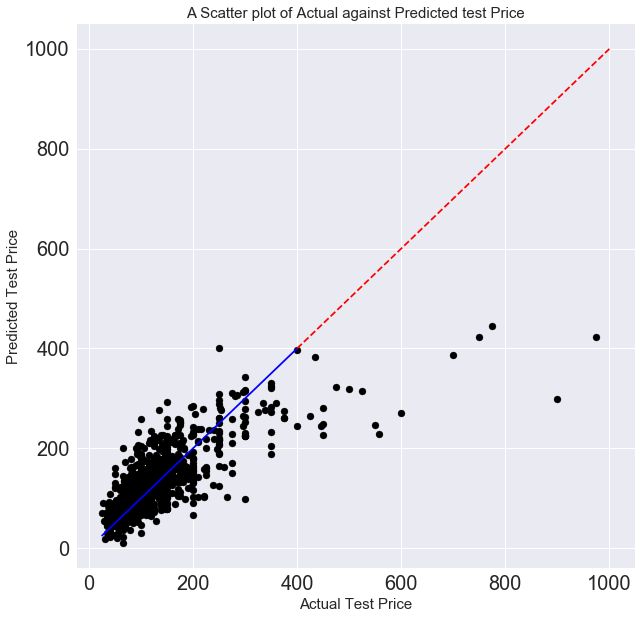

In [42]:

fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(y_test,predicted_test_price, color = 'black')
#plt.plot(y_test, predicted_test_price, color='blue', linewidth=3)
ax.plot([y_test.min(),400],[y_test.min(),400], color = "blue", linestyle = "solid")
ax.plot([400,1000],[400,1000], "r--")

ax.set_xlabel('Actual Test Price', fontsize = 15)
ax.set_ylabel('Predicted Test Price', fontsize = 15)
ax.set_title("A Scatter plot of Actual against Predicted test Price", fontsize = 15)
#ax.set(font_scale = 1)


plt.show()

In [50]:
#def model_result(X_train,X_test, y_train, y_test, model, score):
#y_test.min()
train_mse_score  = mse(y_train, predicted_train_price)
test_mse_score = mse(y_test, predicted_test_price)
print("The train score is {}".format(train_mse_score))
print("The test score is {}".format(test_mse_score))



The train score is 9.13628296117587e+25
The test score is 3499.7880354862377


In [49]:
#def model_result(X_train,X_test, y_train, y_test, model, score):
#y_test.min()
train_rmse_score  = r2_score(y_train, predicted_train_price)
test_rmse_score = r2_score(y_test, predicted_test_price)
print("The train score is {}".format(train_rmse_score))
print("The test score is {}".format(test_rmse_score))



The train score is -1.1384027913348016e+22
The test score is 0.5880105371666753
